In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath ="./dataset"

In [10]:
dict_data ={
    "c0" : np.arange(1,4),
    "c1" : np.arange(4,7),
    "c2" : np.arange(7,10),
    "c3" : np.arange(10,13),
    "c4" : np.arange(13,16),
}
df = pd.DataFrame(dict_data, index = ["r0","r1","r2"])
print(df)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [11]:
## index 정렬
df.sort_index(ascending=False, inplace= True)
print("df = \n", df)

## value
print("*" * 50) 
df.sort_values(by = "c0", ascending= True ,inplace=True)
print("df = \n", df)


df = 
     c0  c1  c2  c3  c4
r2   3   6   9  12  15
r1   2   5   8  11  14
r0   1   4   7  10  13
**************************************************
df = 
     c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [15]:
## Broadcasting
titanic = sns.load_dataset("titanic")
print(titanic.head())
won = titanic["fare"] * 1300

titanic.insert(7, "won", won)
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
   survived  pclass     sex   age  sibsp  parch     fare       won embarked  \
0         0       3    male  22.0      1      0   7.2500   9425.00        S   
1         1       1  female  38.0      1      0  71.2833  926

In [19]:
titanic.head()

new_df = titanic.loc[:, "fare":"won"]
print(new_df.head())
print("*" * 50)
add_df = new_df + 1000
print(add_df)

add_df - new_df

      fare       won
0   7.2500   9425.00
1  71.2833  92668.29
2   7.9250  10302.50
3  53.1000  69030.00
4   8.0500  10465.00
**************************************************
          fare       won
0    1007.2500  10425.00
1    1071.2833  93668.29
2    1007.9250  11302.50
3    1053.1000  70030.00
4    1008.0500  11465.00
..         ...       ...
886  1013.0000  17900.00
887  1030.0000  40000.00
888  1023.4500  31485.00
889  1030.0000  40000.00
890  1007.7500  11075.00

[891 rows x 2 columns]


,fare,won
0,1000.0,1000.0
1,1000.0,1000.0
2,1000.0,1000.0
3,1000.0,1000.0
4,1000.0,1000.0
...,...,...
886,1000.0,1000.0
887,1000.0,1000.0
888,1000.0,1000.0
889,1000.0,1000.0


In [49]:
fname = "vor_r.xlsx"
file = os.path.join(fpath, fname)
vor = pd.read_excel(file)
print("vor = \n", vor)

## 
mean_col = vor.loc[:, "hz0.04":].mean(axis=1)  # 열 이름 "hz0.04"가 존재하는지 확인

# 새로운 열 추가
vor.insert(3, "mean_col", mean_col)

# "mean_col" 기준으로 정렬
vor.sort_values(by="mean_col", ascending=False, inplace=True)

# 상위 10개 행 출력
print(vor.iloc[:10, :4])






vor = 
     group  id    time    hz0.04    hz0.08     hz0.1    hz0.16    hz0.32  \
0       1   1     Pre  0.213840  0.717955  0.848727  0.850790  0.802738   
1       1   2     Pre  0.345725  0.795440  0.781473  0.924972  0.801245   
2       1   3     Pre  0.376285  0.799327  0.781350  0.777773  0.868007   
3       1   4     Pre  0.451440  0.771083  0.808645  0.787825  0.839985   
4       1   5     Pre  0.287360  0.825547  0.831303  0.818332  0.817320   
..    ...  ..     ...       ...       ...       ...       ...       ...   
59      2  12  Post14  0.079660  0.237193  0.471418  0.474830  0.585082   
60      2  13  Post14  0.085117  0.387700  0.403857  0.583710  0.665262   
61      2  14  Post14  0.058188  0.399475  0.467535  0.648505  0.657350   
62      2  15  Post14  0.098390  0.357222  0.478880  0.456372  0.536233   
63      2  16  Post14  0.117395  0.449813  0.472043  0.571655  0.690753   

      hz0.64       hz1  
0   0.808393  0.738967  
1   0.803880  0.781420  
2   0.868853  0.

In [52]:
## Filter
vor_df10 = vor.iloc[:10, :4]

# 6번째 행부터 10번째 행까지의 3번째 열을 "Post"로 설정
vor_df10.iloc[5:, 2] = "Post"

# 결과 출력
print(vor_df10)

    group  id  time  mean_col
13      2  14   Pre  0.807488
7       1   8   Pre  0.805965
6       1   7   Pre  0.798594
8       1   9   Pre  0.794495
12      2  13   Pre  0.780265
11      2  12  Post  0.777636
5       1   6  Post  0.775674
3       1   4  Post  0.758579
14      2  15  Post  0.758175
15      2  16  Post  0.753647


In [65]:
idx1 = vor_df10.loc[:, "time"] != "Pre"
print(idx1)

idx2 = vor_df10.loc[:, 'mean_col'] > 0.77
print(idx2)


print(vor_df10[(idx2)] & [(idx2) & (vor_df10.loc[:, "group"] == 1)])
print(vor_df10[(idx2)] | [(idx2)])


13    False
7     False
6     False
8     False
12    False
11     True
5      True
3      True
14     True
15     True
Name: time, dtype: bool
13     True
7      True
6      True
8      True
12     True
11     True
5      True
3     False
14    False
15    False
Name: mean_col, dtype: bool


ValueError: Unable to coerce list of <class 'pandas.core.series.Series'> to Series/DataFrame

Correlation Coefficient =
            total_bill       tip
total_bill    1.000000 -0.060104
tip          -0.060104  1.000000


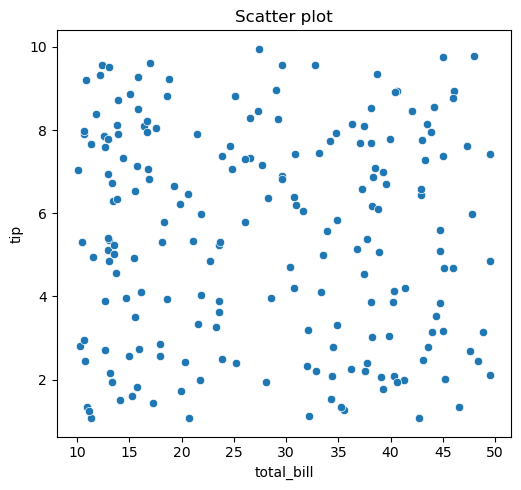

In [82]:
tips = sns.load_dataset("tips")
df = pd.DataFrame({
    'total_bill': np.random.uniform(10, 50, 200),
    'tip': np.random.uniform(1, 10, 200)
})

# 상관계수 계산
correlation = df[['total_bill', 'tip']].corr()

# 결과 출력
print("=" * 80)
print("Correlation Coefficient =")
print(correlation.round(6))
print("=" * 80)

# 산점도 그리기
plt.figure(figsize=(10, 5))
plt.subplot(121)  # 1행 2열의 첫 번째 그래프
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter plot')

# 그래프 표시
plt.tight_layout()
plt.show()


In [99]:
mpg = sns.load_dataset("mpg")
print(mpg)

mpg['mpg_converted'] = mpg['mpg'] * 0.425143
print(mpg)

kmh_values = mpg['mpg'] * 1.60934 / 3.78541

mpg.insert(1, 'kmh', kmh_values)

print(mpg)



      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      